In [373]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytz

In [374]:
sns.set()

In [375]:
os.chdir('C:\\Users\\Janice\\Downloads')

In [376]:
df = pd.read_csv('bitfinex_btcusd (1).csv')

In [377]:
df.head()


,Unnamed: 0,time,open,close,high,low,volume,id_date
0,60,2021-02-15 00:00:00+08:00,48529.000000,48578.000000,48612.000000,48520.000000,12.926627,20210215
1,59,2021-02-15 00:01:00+08:00,48578.000000,48630.000000,48631.000000,48577.000000,4.387715,20210215
2,58,2021-02-15 00:02:00+08:00,48631.000000,48598.384466,48631.000000,48598.384466,4.431785,20210215
3,57,2021-02-15 00:03:00+08:00,48578.495841,48421.000000,48578.495841,48411.000000,5.557589,20210215
4,56,2021-02-15 00:04:00+08:00,48421.000000,48464.000000,48504.000000,48421.000000,9.576957,20210215


In [378]:
df.dtypes

Unnamed: 0      int64
time           object
open          float64
close         float64
high          float64
low           float64
volume        float64
id_date         int64
dtype: object

In [379]:
df['time'] = pd.to_datetime(df['time'])

In [380]:
df.index = df['time']

In [381]:
df.index = df.index.tz_convert(None) #convert to UTC+0

In [382]:
df2 = df[['close']]

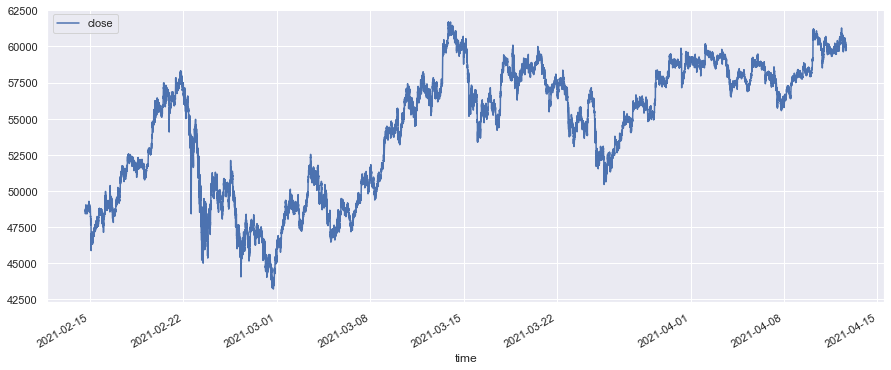

In [383]:
df2.plot( figsize = (15,6))
plt.show()

In [384]:
#df3 = df2.loc['20210330':'20210406']
df3 = df2.loc['20210330 12:00':'20210403 07:00'] #take time period where we have tweets available for study

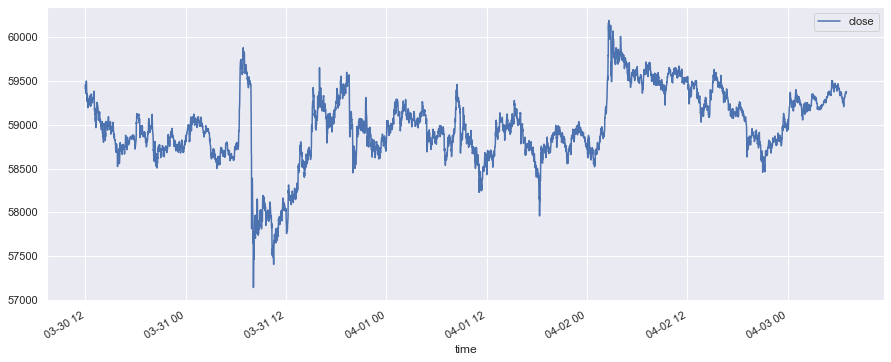

In [385]:
df3.plot(figsize = (15,6))
plt.show()

In [386]:
df3.head()

,close
time,
2021-03-30 12:00:00,59408.0
2021-03-30 12:01:00,59458.0
2021-03-30 12:02:00,59386.0
2021-03-30 12:03:00,59358.0
2021-03-30 12:04:00,59402.0


In [387]:
df3.shape

(5451, 1)

<AxesSubplot:xlabel='time'>

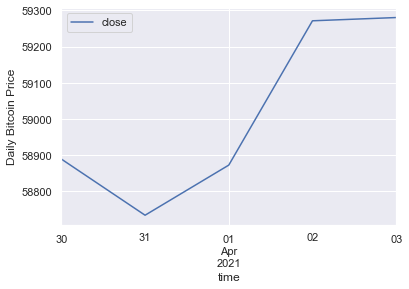

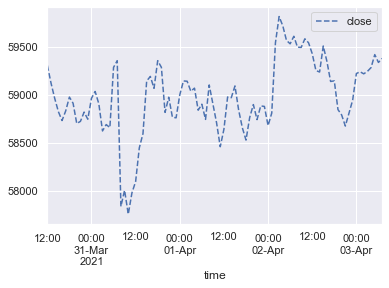

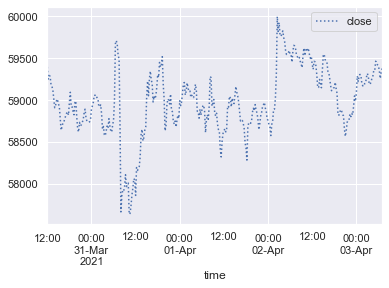

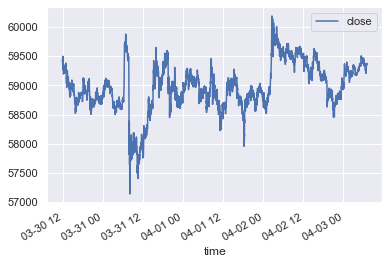

In [388]:
weekly = df3.resample('D').mean()
weekly.plot(style=[ '-'])
plt.ylabel('Daily Bitcoin Price');

hourly = df3.resample('H').mean()
hourly.plot(style=['--'])

fifteenmin = df3.resample('15min').mean()
fifteenmin.plot(style=[':'])


df3.plot()


In [389]:
df3_hourly = df3.resample('H').mean()

In [390]:
df3_hourly

,close
time,
2021-03-30 12:00:00,59306.973411
2021-03-30 13:00:00,59123.057681
2021-03-30 14:00:00,58963.799333
2021-03-30 15:00:00,58825.225059
2021-03-30 16:00:00,58732.565952
...,...
2021-04-03 03:00:00,59243.726235
2021-04-03 04:00:00,59283.542087
2021-04-03 05:00:00,59418.276265


In [391]:
df3_hourly['lag1'] = df3_hourly['close'].shift(1)

In [392]:
df3_hourly['variance'] =  df3_hourly['close'] - df3_hourly['lag1']


<AxesSubplot:>

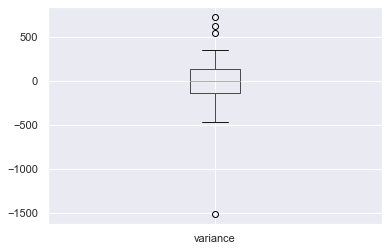

In [393]:
df3_hourly.boxplot('variance')

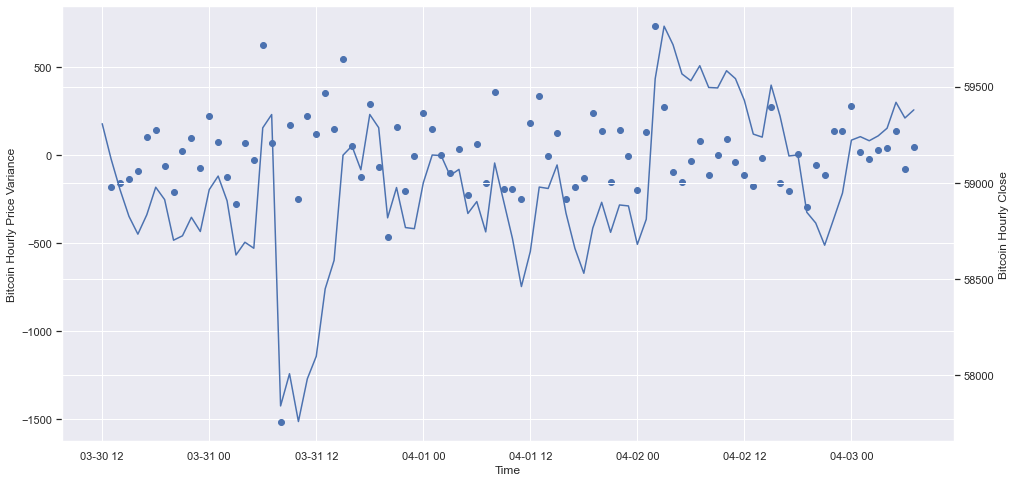

In [394]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3_hourly.index, df3_hourly['variance'] )

ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Hourly Price Variance')


ax2 = ax.twinx()
ax2.plot(df3_hourly.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

In [395]:
df3_hourly[abs(df3_hourly['variance'])/df3_hourly['close']>.01]

,close,lag1,variance
time,,,
2021-03-31 06:00:00,59285.542919,58659.189039,626.353880
2021-03-31 08:00:00,57839.082215,59354.732254,-1515.650039
2021-04-02 02:00:00,59540.796042,58810.080559,730.715483


In [396]:
#events_df = df3_hourly[abs(df3_hourly['variance'])>1000]
events_df = df3_hourly[abs(df3_hourly['variance'])/df3_hourly['close']>.01]

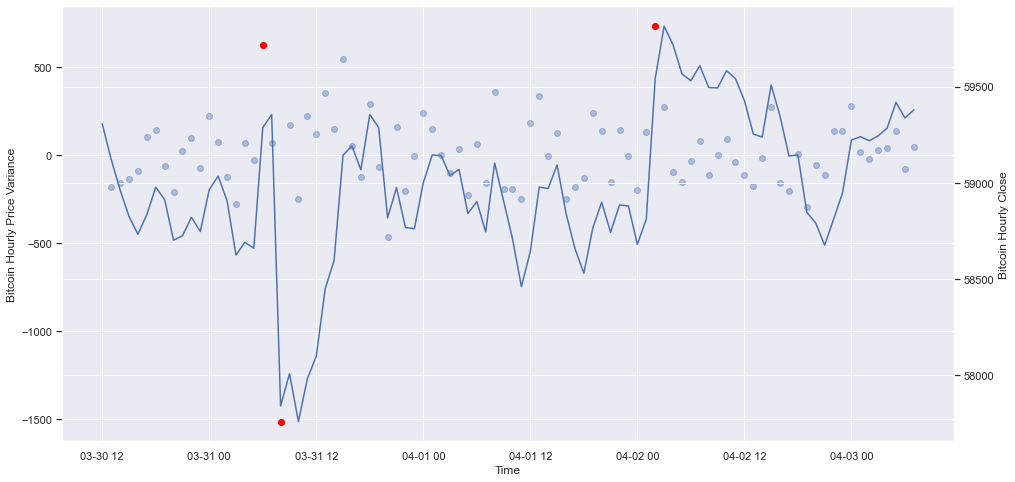

In [397]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3_hourly.index, df3_hourly['variance'], alpha = 0.4 )
ax.scatter(events_df.index, events_df['variance'], color = 'red')
ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Hourly Price Variance')


ax2 = ax.twinx()
ax2.plot(df3_hourly.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

In [398]:
from pandas.plotting import lag_plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

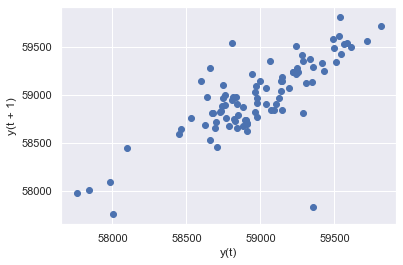

In [399]:

lag_plot(df3_hourly.close)

Positive correlation between the close tne their lag 1 values

In [400]:
#autocorrelation plot
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

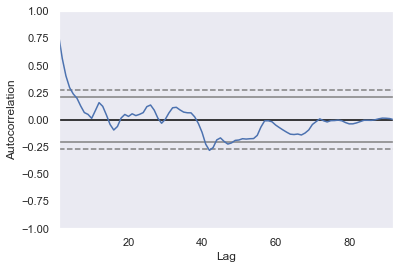

In [401]:
autocorrelation_plot(df3_hourly.close)

(0.0, 2.0)

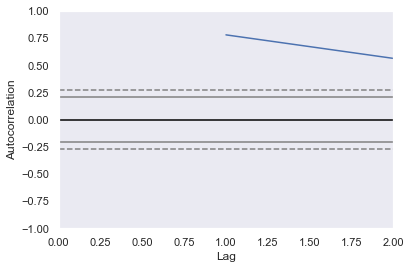

In [402]:
autocorrelation_plot(df3_hourly.close).set_xlim([0,2])

Hourly closing price is highly correlated with the lag 1 price

## import tweets_data

In [403]:
#tweets_data = pd.read_csv('tweets_0318-0327.csv')
tweets_data = pd.read_csv('tweets_0330-0407.csv')


<AxesSubplot:>

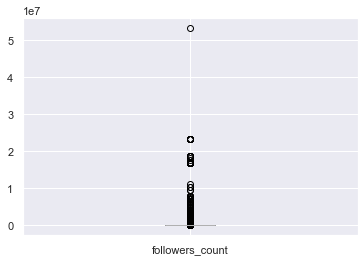

In [404]:
tweets_data.boxplot('followers_count')

In [405]:
tweets_data.head()

,tweet_id,twitter_handle_name,twitter_handle_id,tweet_datetime,twitter_handle_desc,followers_count,friends_count,listed_count,created_at_datetime,twitter_datetime_hour,statuses_count,tweet,truncated
0,1378465710087675905,TwittOne,5772222,2021-04-04 05:53:30,#,14,90,0,2007-05-04 18:00:01,2021-04-04 05:00:00,563,"@intocryptoverse Ben, Any chance you can take ...",True
1,1379181356702384128,bltstien,6514202,2021-04-06 05:17:14,"""Every nation, whether rich or poor, powerful ...",16883,538,0,2007-06-02 01:11:16,2021-04-06 05:00:00,194,Bitcoin wasn’t built in a day. https://t.co/Tf...,False
2,1379182801921138696,bltstien,6514202,2021-04-06 05:22:58,"""Every nation, whether rich or poor, powerful ...",16883,538,0,2007-06-02 01:11:16,2021-04-06 05:00:00,194,Mining the last bitcoin after 131 years of eco...,False
3,1379182237355245571,bltstien,6514202,2021-04-06 05:20:44,"""Every nation, whether rich or poor, powerful ...",16883,538,0,2007-06-02 01:11:16,2021-04-06 05:00:00,194,The same people who thought you were crazy for...,True
4,1379182029061947396,bltstien,6514202,2021-04-06 05:19:54,"""Every nation, whether rich or poor, powerful ...",16883,538,0,2007-06-02 01:11:16,2021-04-06 05:00:00,194,Bitcoin cannot be stopped. #NewProfilePic http...,False


In [406]:
tweets_data.dtypes

tweet_id                  int64
twitter_handle_name      object
twitter_handle_id         int64
tweet_datetime           object
twitter_handle_desc      object
followers_count           int64
friends_count             int64
listed_count              int64
created_at_datetime      object
twitter_datetime_hour    object
statuses_count            int64
tweet                    object
truncated                  bool
dtype: object

In [407]:
#tweets_data['DateTime'] = pd.to_datetime(tweets_data['twitter_datetime'])

In [408]:
tweets_data['DateTime'] =  pd.to_datetime(tweets_data['tweet_datetime'])


In [409]:
tweets_data['tweet_hour'] = tweets_data['DateTime'].dt.floor('H')

In [410]:
tweets_data['tweet_15min'] = tweets_data['DateTime'].dt.floor('15min')

In [411]:
tweets_data['tweet_15min'].head()

0   2021-04-04 05:45:00
1   2021-04-06 05:15:00
2   2021-04-06 05:15:00
3   2021-04-06 05:15:00
4   2021-04-06 05:15:00
Name: tweet_15min, dtype: datetime64[ns]

In [412]:
tweets_data.dtypes

tweet_id                          int64
twitter_handle_name              object
twitter_handle_id                 int64
tweet_datetime                   object
twitter_handle_desc              object
followers_count                   int64
friends_count                     int64
listed_count                      int64
created_at_datetime              object
twitter_datetime_hour            object
statuses_count                    int64
tweet                            object
truncated                          bool
DateTime                 datetime64[ns]
tweet_hour               datetime64[ns]
tweet_15min              datetime64[ns]
dtype: object

In [413]:
tweets_data.shape # (111729, 15) #2nd twitter set - 501389

(501389, 16)

In [414]:
#drop duplicate tweets collected
tweets_data = tweets_data.drop_duplicates()

In [415]:
tweets_data.shape #end Mar dataset(108155, 15) #beg Apr dataset(493398, 15)

(493398, 16)

In [422]:
tweets_data.drop_duplicates('tweet_id', keep="last", inplace=True)

In [426]:
tweets_data.shape #(431932, 16)

(431932, 16)

In [427]:
tweets_data.index = tweets_data.tweet_datetime

In [483]:
tweets_data = tweets_data.loc['20210330 12:00':'20210403 07:00'] #take data with no gap

In [428]:
tweets_data_hourly = tweets_data
tweets_data_hourly.index = tweets_data.tweet_hour

In [429]:
tweets_volume_hourly = pd.DataFrame(tweets_data_hourly.loc['20210330 12:00':'20210403 07:00'].index.value_counts())

In [430]:
tweets_volume_hourly.columns = ['volume']

In [431]:
tweets_volume_hourly.sort_index(inplace = True)

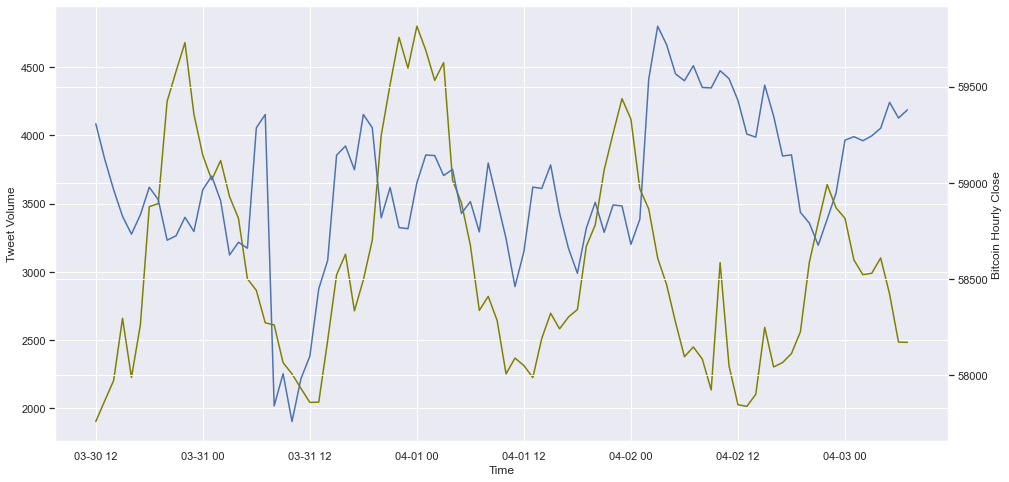

In [432]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(tweets_volume_hourly.volume, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume')


ax2 = ax.twinx()
ax2.plot(df3_hourly.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

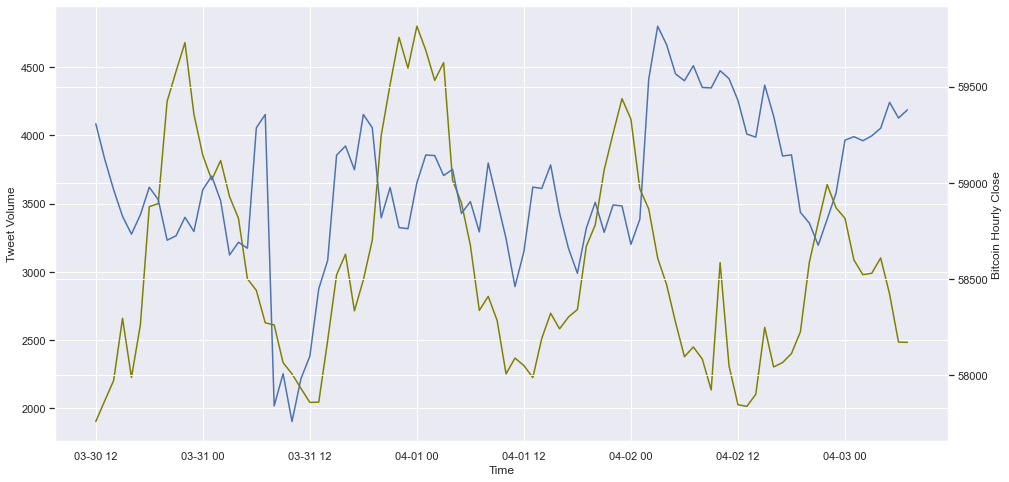

In [433]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(tweets_volume_hourly.volume, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume')


ax2 = ax.twinx()
ax2.plot(df3_hourly.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

### Check out 15 min plots instead of hourly

In [434]:
# try 15min  plots instead of hourly
df3_15min = df3.resample('15min').mean()
df3_15min.head()


,close
time,
2021-03-30 12:00:00,59397.319582
2021-03-30 12:15:00,59250.825567
2021-03-30 12:30:00,59293.881830
2021-03-30 12:45:00,59285.866667
2021-03-30 13:00:00,59188.080253


In [435]:
df3_15min['lag1'] = df3_15min['close'].shift(1)
df3_15min['variance'] =  df3_15min['close'] - df3_15min['lag1']


<AxesSubplot:>

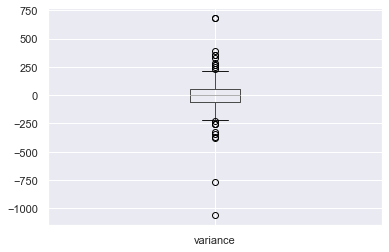

In [436]:
df3_15min.boxplot('variance')

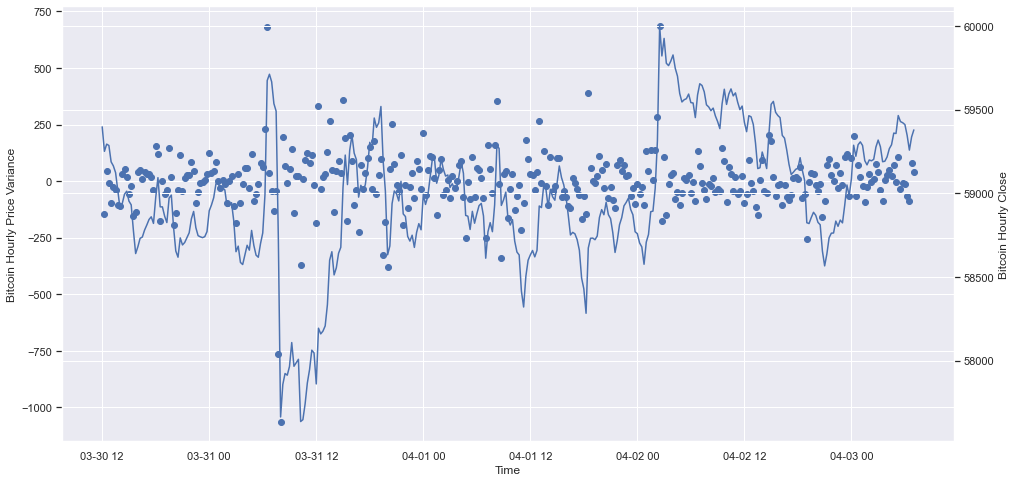

In [437]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3_15min.index, df3_15min['variance'] )

ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Hourly Price Variance')


ax2 = ax.twinx()
ax2.plot(df3_15min.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

In [438]:
df3_15min[abs(df3_15min['variance'])/df3_15min['close']>.01]

,close,lag1,variance
time,,,
2021-03-31 06:30:00,59674.055335,58993.407132,680.648203
2021-03-31 07:45:00,58725.521188,59491.115113,-765.593925
2021-03-31 08:00:00,57663.181475,58725.521188,-1062.339713
2021-04-02 02:30:00,59998.888637,59314.351595,684.537041


In [439]:
#events_df = df3_hourly[abs(df3_hourly['variance'])>1000]
events_df_15min = df3_15min[abs(df3_15min['variance'])/df3_15min['close']>.01]

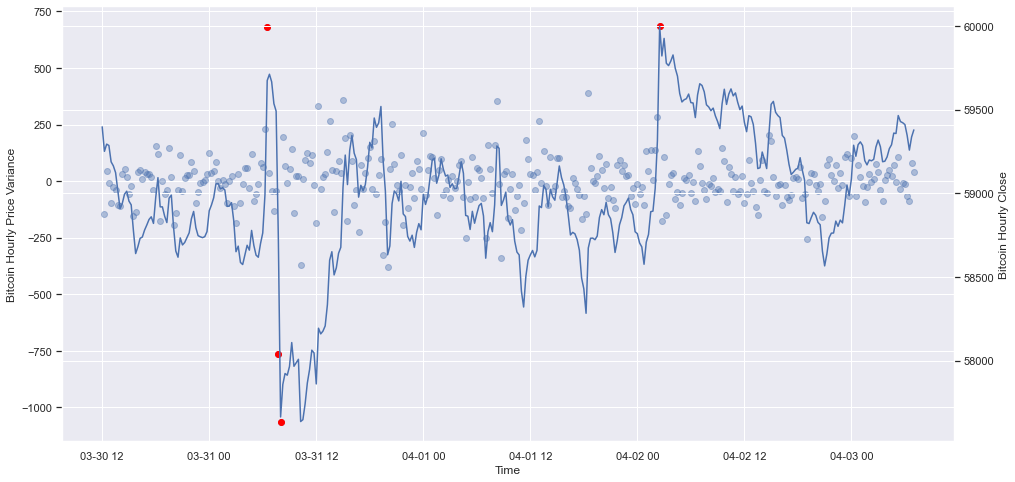

In [440]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3_15min.index, df3_15min['variance'], alpha = 0.4 )
ax.scatter(events_df_15min.index, events_df_15min['variance'], color = 'red')
ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Hourly Price Variance')


ax2 = ax.twinx()
ax2.plot(df3_15min.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

In [441]:
tweets_data_15min = tweets_data
tweets_data_15min.index = tweets_data.tweet_15min
tweets_volume_15min = pd.DataFrame(tweets_data_15min.loc['20210330 12:00':'20210403 07:00'].index.value_counts())


In [442]:
tweets_volume_15min.columns = ['volume']

In [443]:
tweets_volume_15min.sort_index(inplace = True)

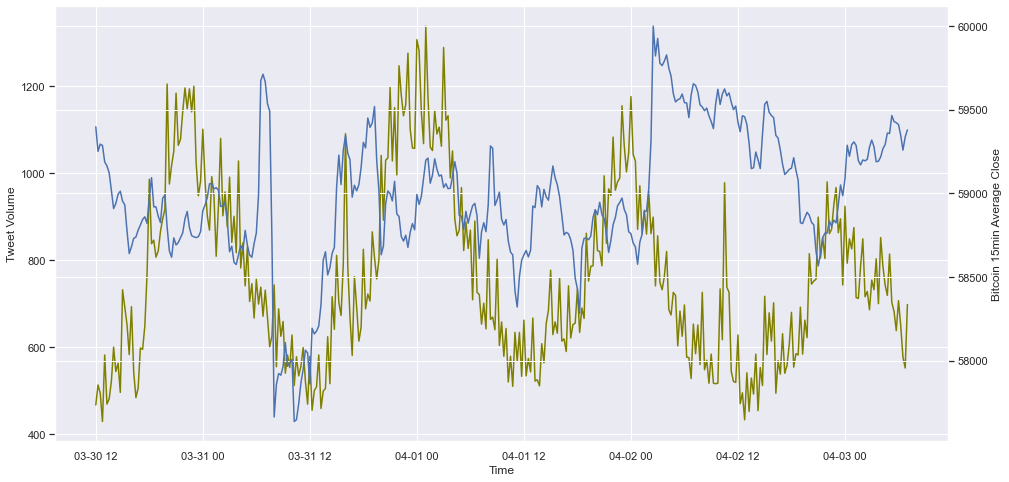

In [444]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(tweets_volume_15min.volume, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume')


ax2 = ax.twinx()
ax2.plot(df3_15min.close)
ax2.set_ylabel('Bitcoin 15min Average Close')

plt.show()

### scale Tweet Volume & Price

In [445]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [446]:
import numpy as np

In [447]:
tweets_volume_hourly['volume_scaled'] = scaler.fit_transform(np.array(tweets_volume_hourly.volume).reshape(-1,1))

In [448]:
df3_hourly['close_scaled'] = scaler.fit_transform(np.array(df3_hourly.close).reshape(-1,1))

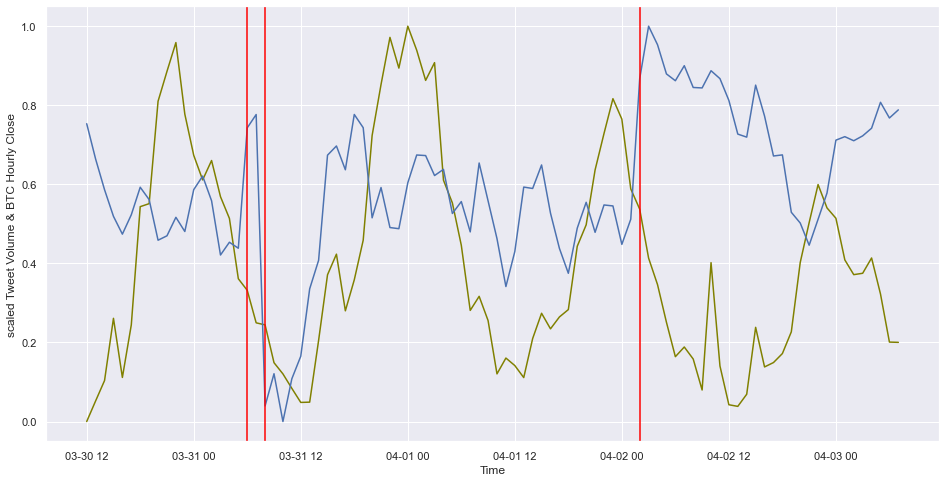

In [449]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(tweets_volume_hourly.volume_scaled, color = 'olive')
ax.plot(df3_hourly.close_scaled)

#for i in range(len(events_df.index)):
#    plt.axvline(events_df.index[i],color='red')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
ax.set_xlabel('Time')
ax.set_ylabel('scaled Tweet Volume & BTC Hourly Close')


#ax2 = ax.twinx()

#ax2.scatter(events_df.index, events_df['variance'], color = 'red')
#ax2.scatter(df3_hourly.index, df3_hourly['variance'], alpha = 0.4 )
#ax2.set_ylabel('')

plt.show()

In [450]:
tweets_volume_hourly.volume.max()

4799

In [451]:
tweets_volume_hourly[tweets_volume_hourly.volume == tweets_volume_hourly.volume.max()]

,volume,volume_scaled
2021-04-01,4799,1.0


In [452]:
tweets_volume_hourly.volume.min()

1903

## Does Bitcoin price varies with Volume of Tweets? 

In [453]:
from scipy.stats import pearsonr

In [454]:
print(tweets_volume_hourly.shape)
print(df3_hourly.shape)

(92, 2)
(92, 4)


In [455]:
#combine df
combined = tweets_volume_hourly.join(df3_hourly, how = 'inner')

In [456]:
combined.shape

(92, 6)

In [457]:
combined.head()

,volume,volume_scaled,close,lag1,variance,close_scaled
2021-03-30 12:00:00,1903,0.000000,59306.973411,NaN,NaN,0.753321
2021-03-30 13:00:00,2054,0.052141,59123.057681,59306.973411,-183.915730,0.663883
2021-03-30 14:00:00,2203,0.103591,58963.799333,59123.057681,-159.258348,0.586436
2021-03-30 15:00:00,2659,0.261050,58825.225059,58963.799333,-138.574274,0.519048
2021-03-30 16:00:00,2226,0.111533,58732.565952,58825.225059,-92.659107,0.473988


In [458]:
combined.isna().sum()

volume           0
volume_scaled    0
close            0
lag1             1
variance         1
close_scaled     0
dtype: int64

In [459]:
combined.dropna(inplace=True)
combined.isna().sum()

volume           0
volume_scaled    0
close            0
lag1             0
variance         0
close_scaled     0
dtype: int64

In [460]:
# calculate Pearson's correlation
corr, _ = pearsonr(combined.volume, combined.close)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.041


#### Low correlation between BTC price and volume of tweets!

In [461]:
# calculate Pearson's correlation
corr, _ = pearsonr(combined.volume, abs(combined.variance))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.071


#### Low correlation between BTC hourly price variance and volume of tweets

In [462]:
combined['volume_lag1'] = combined['volume'].shift(1)

In [463]:
combined['volume_variance'] = combined['volume'] - combined['volume_lag1']

In [464]:
combined.isna().sum()

volume             0
volume_scaled      0
close              0
lag1               0
variance           0
close_scaled       0
volume_lag1        1
volume_variance    1
dtype: int64

In [465]:
combined.shape

(91, 8)

In [466]:
combined = combined.dropna()
combined.shape

(90, 8)

In [467]:
#scale variance
combined['tweet_volume_variance_scaled'] = scaler.fit_transform(np.array(combined['volume_variance']).reshape(-1,1))
combined['btc_close_variance_scaled'] = scaler.fit_transform(np.array(combined['variance']).reshape(-1,1))                                                                           
                                                                            

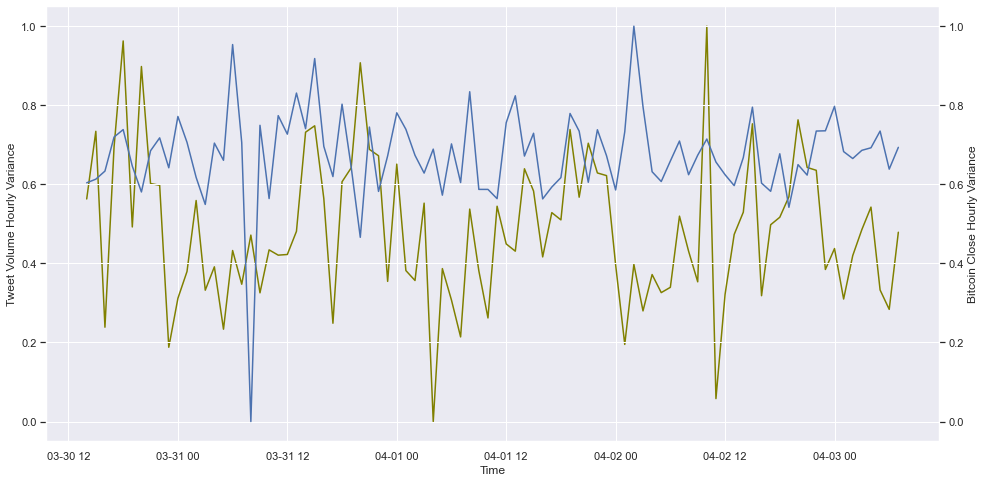

In [468]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')


ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.show()

In [469]:
# calculate Pearson's correlation
corr, _ = pearsonr(combined.volume_variance, combined.variance)
print('Pearsons correlation: %.3f' % corr) #low correlation 

Pearsons correlation: 0.040



### Explore tweets from news sites

In [470]:
tweets_data['twitter_handle_name_lower'] = tweets_data.twitter_handle_name.str.lower()

In [471]:
def checktweetsof(user):
    #tweet_count = listofusers.str.contains(user).sum()
    if user.lower() in tweets_data['twitter_handle_name_lower'].values:
        tweet_count = tweets_data[tweets_data.twitter_handle_name_lower == user.lower()].shape[0]
        if tweet_count > 0:
            print(user," posted ",str(tweet_count)," bitcoin/crypto-related tweets in the period of collection")
        else:
            print("no tweets found for ", user)
    else:
        print("no tweets found for ", user)

In [472]:
tweets_data[tweets_data.twitter_handle_name_lower == 'cnn'.lower()].shape[0]

1

In [473]:
tweets_data[tweets_data.twitter_handle_name_lower == 't1texas'.lower()].shape[0]

36

In [474]:
tweets_data[tweets_data.twitter_handle_name_lower == 't1texas'.lower()]

,tweet_id,twitter_handle_name,twitter_handle_id,tweet_datetime,twitter_handle_desc,followers_count,friends_count,listed_count,created_at_datetime,twitter_datetime_hour,statuses_count,tweet,truncated,DateTime,tweet_hour,tweet_15min,twitter_handle_name_lower
tweet_15min,,,,,,,,,,,,,,,,,
2021-04-05 11:00:00,1378907188597563395,T1Texas,2797403191,2021-04-05 11:07:47,Connecting #Texas To The World. #MetroEthernet...,13312,5435,218,2014-09-08 06:40:30,2021-04-05 11:00:00,30946,@Stonermoonx Guapcoin is #cryptocurrency creat...,True,2021-04-05 11:07:47,2021-04-05 11:00:00,2021-04-05 11:00:00,t1texas
2021-04-07 00:30:00,1379472088302546951,T1Texas,2797403191,2021-04-07 00:32:29,Connecting #Texas To The World. #MetroEthernet...,13312,5434,218,2014-09-08 06:40:30,2021-04-07 00:00:00,30954,@JustMookiiee Guapcoin is #cryptocurrency crea...,True,2021-04-07 00:32:29,2021-04-07 00:00:00,2021-04-07 00:30:00,t1texas
2021-04-06 22:00:00,1379436630289772546,T1Texas,2797403191,2021-04-06 22:11:36,Connecting #Texas To The World. #MetroEthernet...,13310,5434,218,2014-09-08 06:40:30,2021-04-06 22:00:00,30958,@famekeke Guapcoin is #cryptocurrency created ...,True,2021-04-06 22:11:36,2021-04-06 22:00:00,2021-04-06 22:00:00,t1texas
2021-04-06 04:00:00,1379163843822256137,T1Texas,2797403191,2021-04-06 04:07:38,Connecting #Texas To The World. #MetroEthernet...,13308,5431,218,2014-09-08 06:40:30,2021-04-06 04:00:00,30920,@_babydukes Guapcoin is #cryptocurrency create...,True,2021-04-06 04:07:38,2021-04-06 04:00:00,2021-04-06 04:00:00,t1texas
2021-04-06 04:15:00,1379166203751632904,T1Texas,2797403191,2021-04-06 04:17:01,Connecting #Texas To The World. #MetroEthernet...,13308,5431,218,2014-09-08 06:40:30,2021-04-06 04:00:00,30920,@creativeflowhub Guapcoin is #cryptocurrency c...,True,2021-04-06 04:17:01,2021-04-06 04:00:00,2021-04-06 04:15:00,t1texas
2021-04-01 05:15:00,1377370168079306752,T1Texas,2797403191,2021-04-01 05:20:13,Connecting #Texas To The World. #MetroEthernet...,13292,5414,217,2014-09-08 06:40:30,2021-04-01 05:00:00,30831,@Tookiieeee Guapcoin is #cryptocurrency create...,True,2021-04-01 05:20:13,2021-04-01 05:00:00,2021-04-01 05:15:00,t1texas
2021-03-31 00:00:00,1376928087020032000,T1Texas,2797403191,2021-03-31 00:03:32,Connecting #Texas To The World. #MetroEthernet...,13288,5413,217,2014-09-08 06:40:30,2021-03-31 00:00:00,30830,@AY__C Guapcoin is #cryptocurrency created to ...,True,2021-03-31 00:03:32,2021-03-31 00:00:00,2021-03-31 00:00:00,t1texas
2021-03-30 04:30:00,1376633317756448769,T1Texas,2797403191,2021-03-30 04:32:14,Connecting #Texas To The World. #MetroEthernet...,13287,5412,217,2014-09-08 06:40:30,2021-03-30 04:00:00,30824,@SuportBlackBiz Guapcoin is #cryptocurrency cr...,True,2021-03-30 04:32:14,2021-03-30 04:00:00,2021-03-30 04:30:00,t1texas
2021-03-30 05:15:00,1376644953930096648,T1Texas,2797403191,2021-03-30 05:18:28,Connecting #Texas To The World. #MetroEthernet...,13287,5412,217,2014-09-08 06:40:30,2021-03-30 05:00:00,30824,@WholelottaAri Guapcoin is #cryptocurrency cre...,True,2021-03-30 05:18:28,2021-03-30 05:00:00,2021-03-30 05:15:00,t1texas


In [475]:
checktweetsof('t1texas')

t1texas  posted  36  bitcoin/crypto-related tweets in the period of collection


In [476]:
checktweetsof('coindesk')

coindesk  posted  92  bitcoin/crypto-related tweets in the period of collection


In [477]:
newsaccounts = ['coindesk','marketwatch','thestreet','forbes', 'cnn', 'cnnbrk', 'cointelegraph', 'seekingalpha', 'reuters']

In [484]:
for account in newsaccounts:
    checktweetsof(account)

coindesk  posted  60  bitcoin/crypto-related tweets in the period of collection
marketwatch  posted  6  bitcoin/crypto-related tweets in the period of collection
thestreet  posted  10  bitcoin/crypto-related tweets in the period of collection
forbes  posted  15  bitcoin/crypto-related tweets in the period of collection
cnn  posted  1  bitcoin/crypto-related tweets in the period of collection
no tweets found for  cnnbrk
cointelegraph  posted  136  bitcoin/crypto-related tweets in the period of collection
seekingalpha  posted  6  bitcoin/crypto-related tweets in the period of collection
reuters  posted  3  bitcoin/crypto-related tweets in the period of collection


In [494]:


coindesk_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'coindesk']
marketwatch_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'marketwatch']
thestreet_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'thestreet']
forbes_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'forbes']
cnn_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'cnn']
cnnbrk_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'cnnbrk']
cointelegraph_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'cointelegraph']
seekingalpha_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'seekingalpha']
reuters_tweets = tweets_data[tweets_data['twitter_handle_name_lower'] == 'reuters']

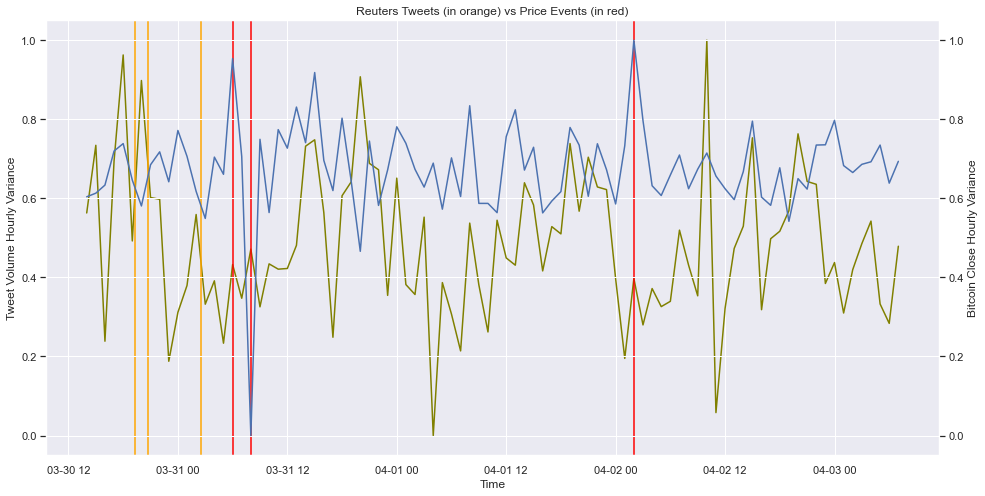

In [495]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(reuters_tweets.index)):
    plt.axvline(reuters_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('Reuters Tweets (in orange) vs Price Events (in red)')
plt.show()

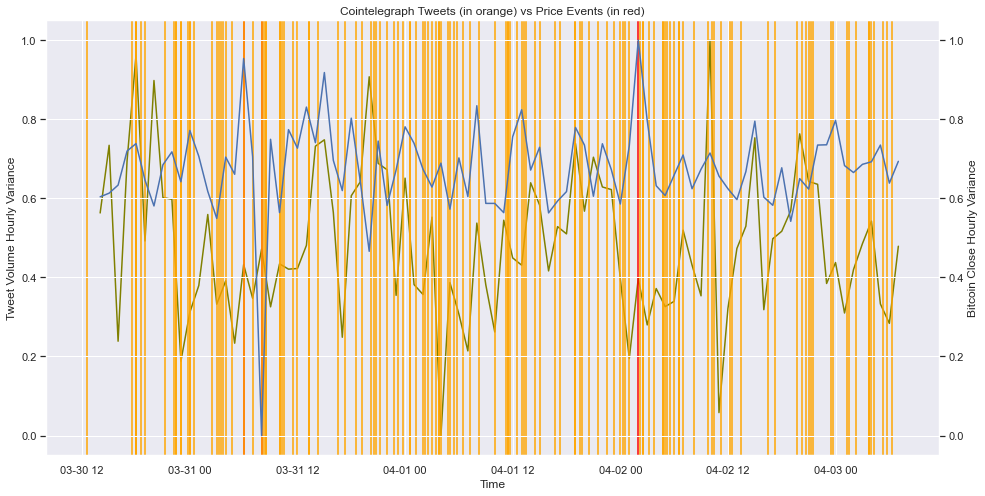

In [496]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(cointelegraph_tweets.index)):
    plt.axvline(cointelegraph_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('Cointelegraph Tweets (in orange) vs Price Events (in red)')

plt.show()

In [499]:
cointelegraph_tweets.head()

,tweet_id,twitter_handle_name,twitter_handle_id,tweet_datetime,twitter_handle_desc,followers_count,friends_count,listed_count,created_at_datetime,twitter_datetime_hour,statuses_count,tweet,truncated,DateTime,tweet_hour,tweet_15min,twitter_handle_name_lower
tweet_15min,,,,,,,,,,,,,,,,,
2021-03-31 10:30:00,1377085761246351361,Cointelegraph,2207129125,2021-03-31 10:30:05,"The leader in Bitcoin, Ethereum & blockchain n...",754033,633,7809,2013-11-21 12:57:08,2021-03-31 10:00:00,48029,Bitcoin to $73K? That seems to be the next lev...,True,2021-03-31 10:30:05,2021-03-31 10:00:00,2021-03-31 10:30:00,cointelegraph
2021-03-31 10:15:00,1377081971638165506,Cointelegraph,2207129125,2021-03-31 10:15:01,"The leader in Bitcoin, Ethereum & blockchain n...",754031,633,7809,2013-11-21 12:57:08,2021-03-31 10:00:00,48029,Want to take up a new instrument during the pa...,True,2021-03-31 10:15:01,2021-03-31 10:00:00,2021-03-31 10:15:00,cointelegraph
2021-03-31 10:00:00,1377081348209340418,Cointelegraph,2207129125,2021-03-31 10:12:33,"The leader in Bitcoin, Ethereum & blockchain n...",754032,633,7809,2013-11-21 12:57:08,2021-03-31 10:00:00,48029,Warning that the supply of USD could increase ...,True,2021-03-31 10:12:33,2021-03-31 10:00:00,2021-03-31 10:00:00,cointelegraph
2021-03-31 10:00:00,1377078275361636363,Cointelegraph,2207129125,2021-03-31 10:00:20,"The leader in Bitcoin, Ethereum & blockchain n...",754046,633,7809,2013-11-21 12:57:08,2021-03-31 10:00:00,48029,Sometimes hodling is the best strategy. Sittin...,True,2021-03-31 10:00:20,2021-03-31 10:00:00,2021-03-31 10:00:00,cointelegraph
2021-03-31 13:15:00,1377128526483099652,Cointelegraph,2207129125,2021-03-31 13:20:01,"The leader in Bitcoin, Ethereum & blockchain n...",753985,633,7810,2013-11-21 12:57:08,2021-03-31 13:00:00,48026,Sometimes hodling is the best strategy. Sittin...,True,2021-03-31 13:20:01,2021-03-31 13:00:00,2021-03-31 13:15:00,cointelegraph


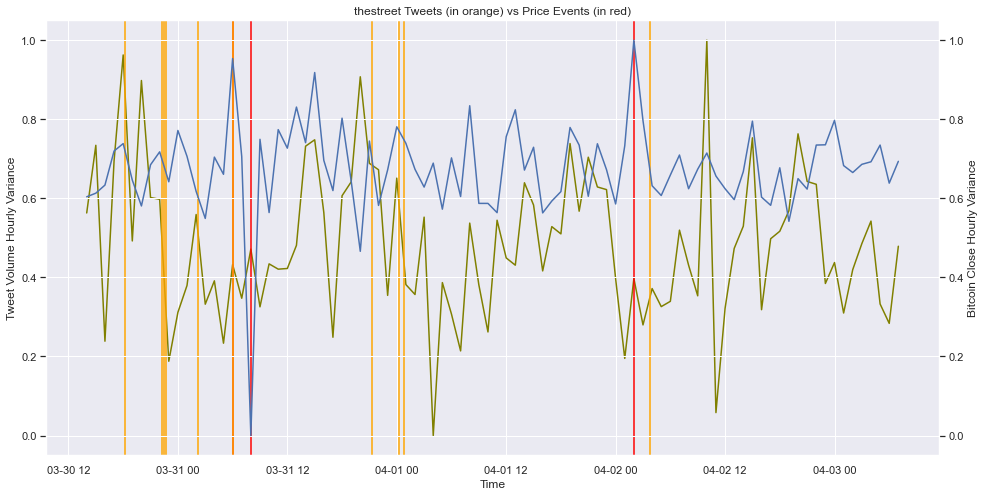

In [497]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(thestreet_tweets.index)):
    plt.axvline(thestreet_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('thestreet Tweets (in orange) vs Price Events (in red)')

plt.show()

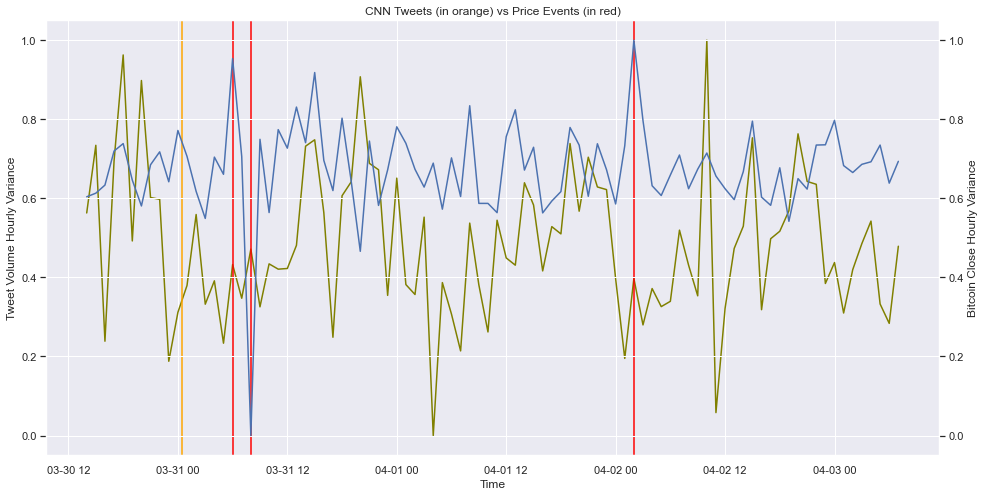

In [498]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(cnn_tweets.index)):
    plt.axvline(cnn_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('CNN Tweets (in orange) vs Price Events (in red)')

plt.show()

In [502]:
combined.head()

,volume,volume_scaled,close,lag1,variance,close_scaled,volume_lag1,volume_variance,tweet_volume_variance_scaled,btc_close_variance_scaled
2021-03-30 14:00:00,2203,0.103591,58963.799333,59123.057681,-159.258348,0.586436,2054.0,149.0,0.562988,0.603816
2021-03-30 15:00:00,2659,0.261050,58825.225059,58963.799333,-138.574274,0.519048,2203.0,456.0,0.734114,0.613024
2021-03-30 16:00:00,2226,0.111533,58732.565952,58825.225059,-92.659107,0.473988,2659.0,-433.0,0.238573,0.633464
2021-03-30 17:00:00,2611,0.244475,58833.415058,58732.565952,100.849106,0.523030,2226.0,385.0,0.694537,0.719606
2021-03-30 18:00:00,3477,0.543508,58976.587447,58833.415058,143.172389,0.592655,2611.0,866.0,0.962653,0.738447


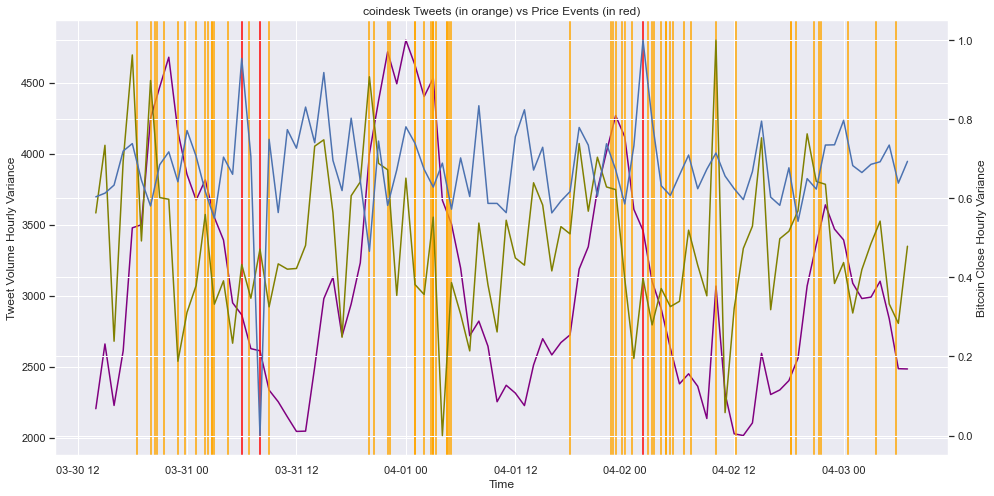

In [505]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(combined.volume, color = 'purple')
ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(coindesk_tweets.index)):
    plt.axvline(coindesk_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.tweet_volume_variance_scaled, color = 'olive')
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('coindesk Tweets (in orange) vs Price Events (in red)')
plt.show()

Coindesk tweets - mainly following US/Europe timezone

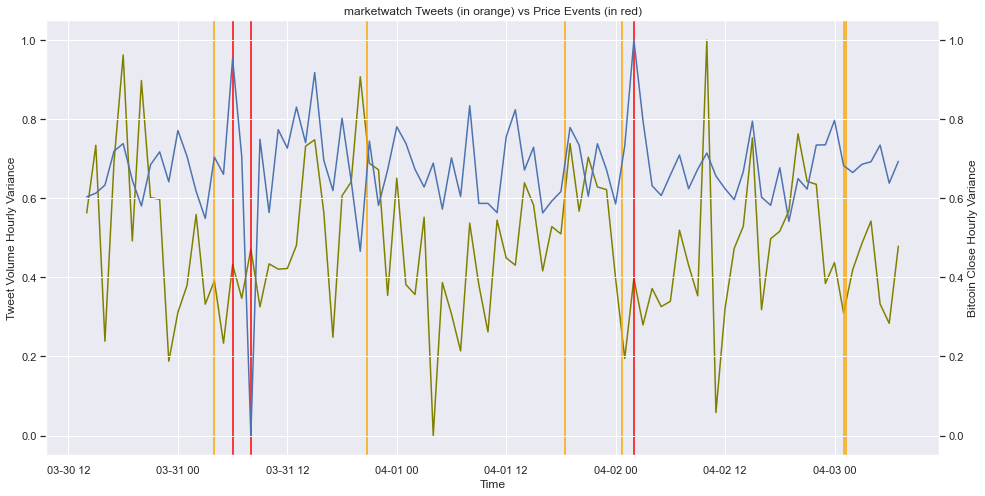

In [506]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(marketwatch_tweets.index)):
    plt.axvline(marketwatch_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('marketwatch Tweets (in orange) vs Price Events (in red)')

plt.show()

In [510]:
marketwatch_tweets.sort_values('DateTime')


,tweet_id,twitter_handle_name,twitter_handle_id,tweet_datetime,twitter_handle_desc,followers_count,friends_count,listed_count,created_at_datetime,twitter_datetime_hour,statuses_count,tweet,truncated,DateTime,tweet_hour,tweet_15min,twitter_handle_name_lower
tweet_15min,,,,,,,,,,,,,,,,,
2021-03-31 04:00:00,1376987793159766023,MarketWatch,624413,2021-03-31 04:00:47,"News, personal finance & commentary from Marke...",4001105,199,27953,2007-01-11 05:15:48,2021-03-31 04:00:00,335851,"Bitcoin knocking on door of $60,000 again on n...",False,2021-03-31 04:00:47,2021-03-31 04:00:00,2021-03-31 04:00:00,marketwatch
2021-03-31 20:45:00,1377242126996664320,MarketWatch,624413,2021-03-31 20:51:25,"News, personal finance & commentary from Marke...",4001417,199,27962,2007-01-11 05:15:48,2021-03-31 20:00:00,335887,Goldman to offer bitcoin and other crypto to w...,False,2021-03-31 20:51:25,2021-03-31 20:00:00,2021-03-31 20:45:00,marketwatch
2021-04-01 18:30:00,1377572442688868359,MarketWatch,624413,2021-04-01 18:43:59,"News, personal finance & commentary from Marke...",4001601,199,27952,2007-01-11 05:15:48,2021-04-01 18:00:00,335907,All in on crypto? MarketWatch is convening exp...,True,2021-04-01 18:43:59,2021-04-01 18:00:00,2021-04-01 18:30:00,marketwatch
2021-04-02 00:45:00,1377665753202237440,MarketWatch,624413,2021-04-02 00:54:46,"News, personal finance & commentary from Marke...",4001589,199,27951,2007-01-11 05:15:48,2021-04-02 00:00:00,335901,Bitcoin backer MicroStrategy initiated at a bu...,True,2021-04-02 00:54:46,2021-04-02 00:00:00,2021-04-02 00:45:00,marketwatch
2021-04-03 01:00:00,1378030372022321160,MarketWatch,624413,2021-04-03 01:03:37,"News, personal finance & commentary from Marke...",4001805,199,27954,2007-01-11 05:15:48,2021-04-03 01:00:00,335934,"Ether, the No. 2 crypto, hit a record above $2...",False,2021-04-03 01:03:37,2021-04-03 01:00:00,2021-04-03 01:00:00,marketwatch
2021-04-03 01:15:00,1378036130919092230,MarketWatch,624413,2021-04-03 01:26:30,"News, personal finance & commentary from Marke...",4001805,199,27955,2007-01-11 05:15:48,2021-04-03 01:00:00,335933,"Ether, the No. 2 cryptocurrency, just hit a re...",False,2021-04-03 01:26:30,2021-04-03 01:00:00,2021-04-03 01:15:00,marketwatch


First and fourth tweet of marketwatch seems to be very close to price events

In [515]:
print(marketwatch_tweets.sort_values('DateTime').index[0], 'tweet: ', marketwatch_tweets.sort_values('DateTime').tweet[0])
print(marketwatch_tweets.sort_values('DateTime').index[3],'tweet: ',marketwatch_tweets.sort_values('DateTime').tweet[3])

2021-03-31 04:00:00 tweet:  Bitcoin knocking on door of $60,000 again on news from PayPal, Visa and Dapper Labs https://t.co/XRjhwlGmtZ
2021-04-02 00:45:00 tweet:  Bitcoin backer MicroStrategy initiated at a buy at BTIG, partly on the back of $95,000 forecast for the crypto by 2… https://t.co/G6ghxpFz35


In [516]:
events_df

,close,lag1,variance
time,,,
2021-03-31 06:00:00,59285.542919,58659.189039,626.353880
2021-03-31 08:00:00,57839.082215,59354.732254,-1515.650039
2021-04-02 02:00:00,59540.796042,58810.080559,730.715483


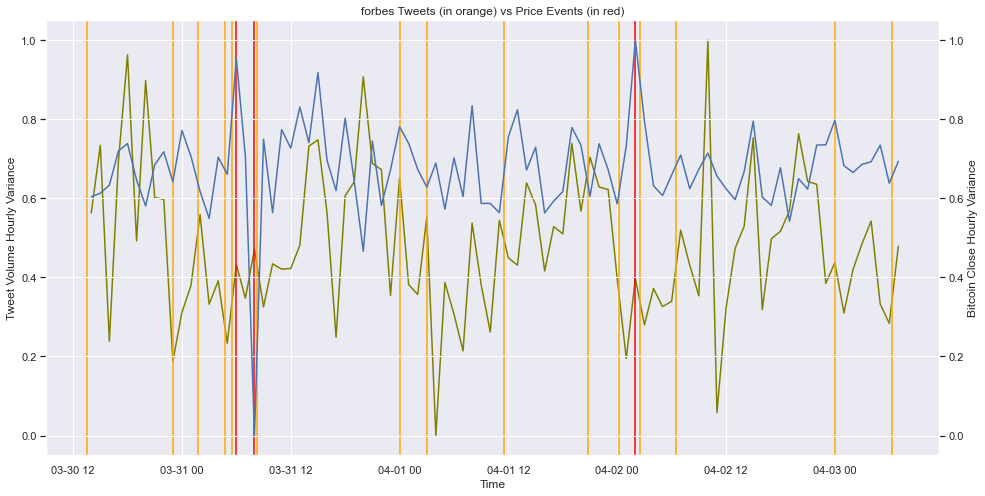

In [517]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(forbes_tweets.index)):
    plt.axvline(forbes_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('forbes Tweets (in orange) vs Price Events (in red)')

plt.show()

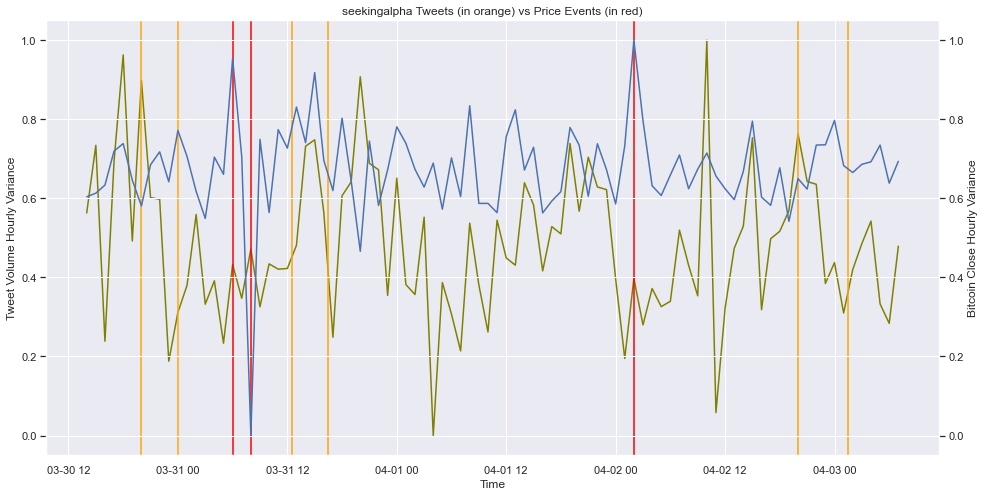

In [518]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(combined.tweet_volume_variance_scaled, color = 'olive')

ax.set_xlabel('Time')
ax.set_ylabel('Tweet Volume Hourly Variance')
for i in range(len(events_df.index)):
    plt.axvline(events_df.index[i],color='red')
for i in range(len(seekingalpha_tweets.index)):
    plt.axvline(seekingalpha_tweets.index[i],color='orange')

ax2 = ax.twinx()
ax2.plot(combined.btc_close_variance_scaled)
ax2.set_ylabel('Bitcoin Close Hourly Variance')

plt.title('seekingalpha Tweets (in orange) vs Price Events (in red)')

plt.show()